In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import locale
import scipy.stats as stats

In [3]:
# read the raw csv file(/s)
movie_file = ("Resources/movies_metadata.csv")

In [4]:
#read the movie file and create a dataframe

movie_data_df = pd.read_csv(movie_file)

#list the column types
#movie_data_df.dtypes


C:\Users\jarrett\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#cleanup and filter steps ( budget, revenue , release year)

movie_data_df = movie_data_df.drop(columns=['adult', 'production_countries','belongs_to_collection','homepage','id','imdb_id','overview','poster_path','runtime','spoken_languages','tagline','original_title','video'])

print( f'Inital count of data from file: {len(movie_data_df)}')

clean_movie_data_df = movie_data_df.loc[movie_data_df["budget"] != 0  ]
print( f'count after filtering out $0 budget: {len(clean_movie_data_df)}')

clean_movie_data_df = clean_movie_data_df.loc[clean_movie_data_df["revenue"] != 0  ]
print( f'count after filtering out $0 revenue: {len(clean_movie_data_df)}')

clean_movie_data_df['release_year']= pd.to_datetime(clean_movie_data_df["release_date"]).dt.year 
clean_movie_data_df = clean_movie_data_df.loc[clean_movie_data_df["release_year"] < 2019 ]
print( f'count after filtering out movies in future date: {len(clean_movie_data_df)}')

clean_movie_data_df['net_loss_profit'] = clean_movie_data_df["revenue"] - clean_movie_data_df["budget"]



Inital count of data from file: 45291
count after filtering out $0 budget: 8886
count after filtering out $0 revenue: 5381
count after filtering out movies in future date: 5364


In [6]:
# extract the Genre from the column that has a list of dictionaries
clean_movie_data_df['Primary Genre']=[json.loads(row.genres.replace("'",'"'))[0]['name'] if row.genres != '[]' else '' for _,row in clean_movie_data_df.iterrows()]
print(clean_movie_data_df[['revenue','net_loss_profit','Primary Genre', 'release_year', 'title', 'popularity']])



           revenue  net_loss_profit    Primary Genre  release_year  \
0      373554033.0      343554033.0        Animation          1995   
1      262797249.0      197797249.0        Adventure          1995   
3       81452156.0       65452156.0           Comedy          1995   
5      187436818.0      127436818.0           Action          1995   
8       64350171.0       29350171.0           Action          1995   
9      352194034.0      294194034.0        Adventure          1995   
10     107879496.0       45879496.0           Comedy          1995   
13      13681765.0      -30318235.0          History          1995   
14      10017322.0      -87982678.0           Action          1995   
15     116112375.0       64112375.0            Drama          1995   
16     135000000.0      118500000.0            Drama          1995   
17       4300000.0         300000.0            Crime          1995   
18     212385533.0      182385533.0            Crime          1995   
19      35431113.0  

In [7]:

# convert number columns: revenue, budget, net_loss_profit to numeric for sorting purposes
clean_movie_data_df['revenue'] = pd.to_numeric(clean_movie_data_df['revenue'])
clean_movie_data_df['budget'] = pd.to_numeric(clean_movie_data_df['budget'])
clean_movie_data_df['net_loss_profit'] = pd.to_numeric(clean_movie_data_df['net_loss_profit'])
clean_movie_data_df['popularity'] = pd.to_numeric(clean_movie_data_df['popularity'])

# sorting movie by revenue from highest to lowest
sort_by_revenue = clean_movie_data_df.sort_values(by='revenue', ascending = False)

# sorting movie by net profit from highest to lowest
sort_by_netProfit = clean_movie_data_df.sort_values(by='net_loss_profit', ascending = False)

# output csv file sort by revenue data
sort_by_revenue.to_csv("revenue.csv", encoding='utf-8')

# output csv file sort by net profit
sort_by_netProfit.to_csv("net_profit_loss.csv", encoding='utf-8')

# print to terminal
#sort_by_netProfit.head(10)

#sort_by_netProfit.dtypes

In [8]:
#top_10_profitable_mv = sort_by_netProfit[:10][['title','net_loss_profit','Primary Genre']].reset_index()


#print(top_10_profitable_mv)

top_10_revenue_mv = sort_by_revenue[:10][['title','revenue','Primary Genre']].reset_index()

print(top_10_revenue_mv)

   index                                         title       revenue  \
0  14528                                        Avatar  2.787965e+09   
1  26484                  Star Wars: The Force Awakens  2.068224e+09   
2   1637                                       Titanic  1.845034e+09   
3  17782                                  The Avengers  1.519558e+09   
4  25016                                Jurassic World  1.513529e+09   
5  28754                                     Furious 7  1.506249e+09   
6  26487                       Avengers: Age of Ultron  1.405404e+09   
7  17401  Harry Potter and the Deathly Hallows: Part 2  1.342000e+09   
8  22054                                        Frozen  1.274219e+09   
9  42070                          Beauty and the Beast  1.262886e+09   

     Primary Genre  
0           Action  
1           Action  
2            Drama  
3  Science Fiction  
4           Action  
5           Action  
6           Action  
7           Family  
8        Animation

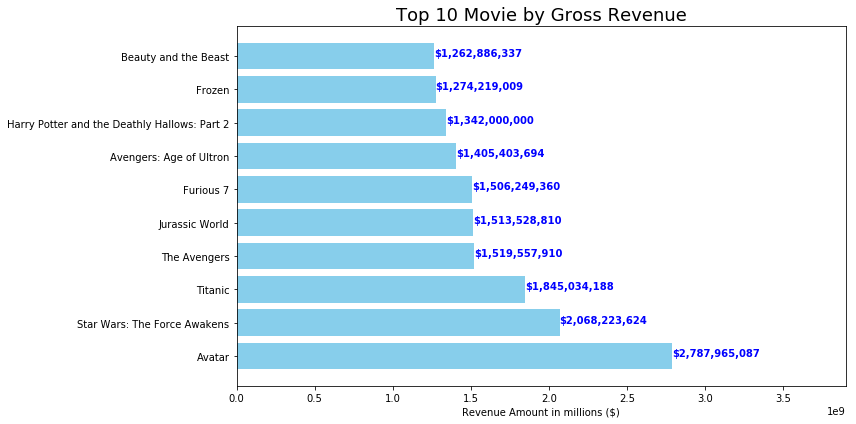

In [9]:
revenue_value = top_10_revenue_mv.revenue
x_title_labels = top_10_revenue_mv.title

y_rev_pos = np.arange(len(x_title_labels))

plt.figure(figsize=(12,6))
plt.barh(y_rev_pos, revenue_value, align='center', height=0.8, color="skyblue")
plt.yticks(y_rev_pos, x_title_labels)
plt.xlim(0,np.max(revenue_value)*1.4)
plt.xlabel('Revenue Amount in millions ($)')
plt.title('Top 10 Movie by Gross Revenue', fontsize = 18)

for i, v in enumerate(revenue_value):
    plt.text(v + 0.5, i, str(('${:,.0f}'.format(v))), color='blue', fontweight='bold')

plt.tight_layout()
plt.show()


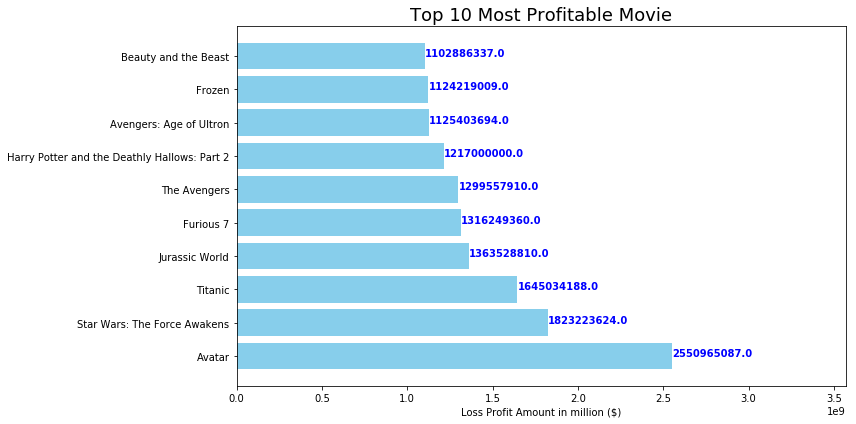

In [10]:
top_10_profitable_mv = sort_by_netProfit[:10][['title','net_loss_profit','Primary Genre']].reset_index()

loss_profit_value = top_10_profitable_mv.net_loss_profit
x_labels = top_10_profitable_mv.title

y_pos = np.arange(len(x_labels))

plt.figure(figsize=(12,6))
plt.barh(y_pos, loss_profit_value, align='center', height=0.8, color="skyblue")
plt.yticks(y_pos, x_labels)
plt.xlim(0,np.max(loss_profit_value)*1.4)
plt.xlabel('Loss Profit Amount in million ($)')
plt.title('Top 10 Most Profitable Movie', fontsize = 18)

for i, v in enumerate(loss_profit_value):
    plt.text(v + 0.5, i, str(v), color='blue', fontweight='bold')

plt.tight_layout()
plt.show()


In [11]:
# create data with only title and primary genre
reduced_data_genre_df = sort_by_revenue[["title", "Primary Genre"]]

reduced_data_genre_df.replace("", "<no genre>", inplace = True)

# get different genre counts
genre_counts = reduced_data_genre_df["Primary Genre"].value_counts()




# Convert the genre_counts Series into a DataFrame
genre_counts_df = pd.DataFrame(genre_counts)



# Add a column Percentage of Players to the DataFrame and calculate the percentage
genre_counts_df["Percentage_of_Genre"] = ((genre_counts_df["Primary Genre"]/reduced_data_genre_df["Primary Genre"].count())*100).round(2).astype(str) + "%"

genre_counts_df

C:\Users\jarrett\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,Primary Genre,Percentage_of_Genre
Drama,1308,24.38%
Comedy,1066,19.87%
Action,960,17.9%
Adventure,412,7.68%
Horror,325,6.06%
Crime,265,4.94%
Thriller,199,3.71%
Animation,146,2.72%
Fantasy,140,2.61%
Romance,120,2.24%


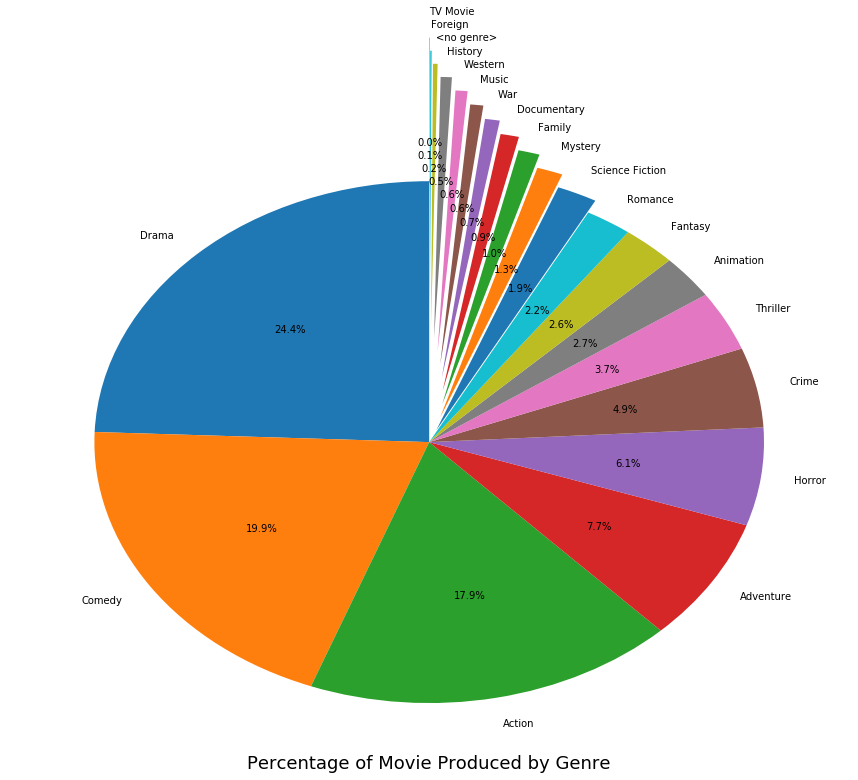

In [12]:
title_list = reduced_data_genre_df["Primary Genre"].value_counts().index.tolist()
value_list = (((genre_counts_df["Primary Genre"]/reduced_data_genre_df["Primary Genre"].count())*100).round(2)).tolist()

fig1, ax1 = plt.subplots(figsize=(15,12))

explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
           0.05, 0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55)
ax1.pie(value_list, labels=title_list, explode = explode, autopct='%1.1f%%',
        startangle=90)


plt.title("Percentage of Movie Produced by Genre", y=-0.01, fontsize = 18)

plt.show()


In [13]:
#df=sort_by_revenue.drop(columns=['budget', 'genres', 'original_language', 'production_companies', 'release_date', 'status', 'release_year', 'popularity', 'vote_average', 'vote_count','net_loss_profit'])
df= sort_by_revenue[['title', 'Primary Genre', 'revenue']]
df

,title,Primary Genre,revenue
14528,Avatar,Action,2.787965e+09
26484,Star Wars: The Force Awakens,Action,2.068224e+09
1637,Titanic,Drama,1.845034e+09
17782,The Avengers,Science Fiction,1.519558e+09
25016,Jurassic World,Action,1.513529e+09
28754,Furious 7,Action,1.506249e+09
26487,Avengers: Age of Ultron,Action,1.405404e+09
17401,Harry Potter and the Deathly Hallows: Part 2,Family,1.342000e+09
22054,Frozen,Animation,1.274219e+09
42070,Beauty and the Beast,Family,1.262886e+09


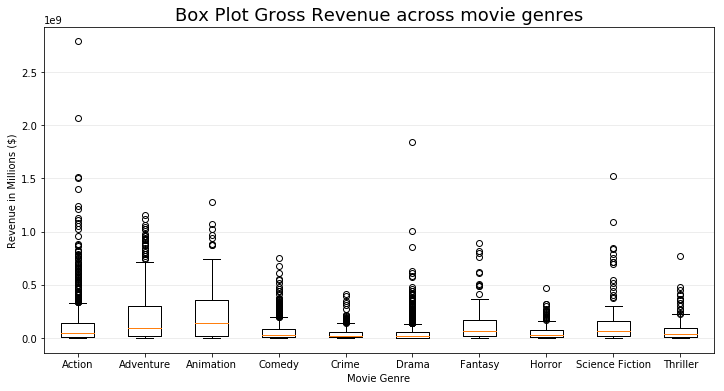

In [14]:


value_action = df.loc[df['Primary Genre'] == 'Action', 'revenue'].tolist()
value_animation = df.loc[df['Primary Genre'] == 'Animation', 'revenue'].tolist()
value_adventure = df.loc[df['Primary Genre'] == 'Adventure', 'revenue'].tolist()
value_comedy = df.loc[df['Primary Genre'] == 'Comedy', 'revenue'].tolist()
value_crime = df.loc[df['Primary Genre'] == 'Crime', 'revenue'].tolist()
value_drama = df.loc[df['Primary Genre'] == 'Drama', 'revenue'].tolist()
value_fantasy = df.loc[df['Primary Genre'] == 'Fantasy', 'revenue'].tolist()
value_horror = df.loc[df['Primary Genre'] == 'Horror', 'revenue'].tolist()
value_science_fiction = df.loc[df['Primary Genre'] == 'Science Fiction', 'revenue'].tolist()
value_thriller = df.loc[df['Primary Genre'] == 'Thriller', 'revenue'].tolist()



fig, ax1 = plt.subplots(figsize=(12, 6))

box_plot_data=[value_action, value_adventure, value_animation, value_comedy, value_crime,
               value_drama, value_fantasy, value_horror, value_science_fiction, value_thriller]

#box_plot_data=[value_action, value_animation]
plt.boxplot(box_plot_data)

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
                                             'Drama', 'Fantasy', 'Horror', 'Science Fiction', 'Thriller'])

# Add a horizontal grid to the plot, but make it very light in color
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

ax1.set_title('Box Plot Gross Revenue across movie genres', fontsize = 18)
ax1.set_xlabel('Movie Genre')
ax1.set_ylabel('Revenue in Millions ($)')

plt.show()


In [15]:

print(df.groupby('Primary Genre').describe().T)


Primary Genre                      Action     Adventure     Animation  \
revenue count  1.200000e+01  9.600000e+02  4.120000e+02  1.460000e+02   
        mean   1.488114e+07  1.232155e+08  2.006484e+08  2.408561e+08   
        std    3.392100e+07  2.224891e+08  2.566323e+08  2.703053e+08   
        min    3.000000e+00  3.000000e+00  3.000000e+00  7.370600e+04   
        25%    4.967342e+05  1.170458e+07  1.789226e+07  2.325000e+07   
        50%    1.611365e+06  4.511827e+07  9.483515e+07  1.401684e+08   
        75%    9.029413e+06  1.409277e+08  3.013673e+08  3.573437e+08   
        max    1.191145e+08  2.787965e+09  1.153304e+09  1.274219e+09   

Primary Genre        Comedy         Crime   Documentary         Drama  \
revenue count  1.066000e+03  2.650000e+02  4.800000e+01  1.308000e+03   
        mean   6.410397e+07  4.939538e+07  1.564947e+07  5.165618e+07   
        std    9.038771e+07  6.890931e+07  2.883124e+07  1.000791e+08   
        min    4.000000e+00  3.000000e+00  2.90000

In [16]:

stats.f_oneway(value_action, value_adventure, value_animation, value_comedy, value_crime,
               value_drama, value_fantasy, value_horror, value_science_fiction, value_thriller)

F_onewayResult(statistic=61.52666583093743, pvalue=2.4435297663743525e-107)

## One - Way ANOVA tests
The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.
The resulting pvalue was less than 0.05. We can reject the null hypothesis and conclude that there is a significant difference between gross revenue for each movie genre. Even though we have obtained a very low p-value, we cannot make any assumptions about the magnitude of the effect. 

Text(0,0.5,'Average Popularity')

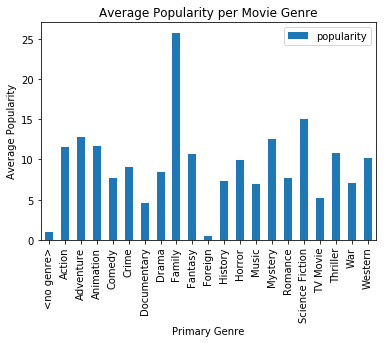

In [53]:
sort_by_revenue.replace("", "<no genre>", inplace = True)
df1 = sort_by_revenue[['title', 'Primary Genre', 'popularity']].groupby('Primary Genre').mean()


#plt.figure(figsize=(20, 10))
ax = df1.plot(kind='bar')
ax.set_title('Average Popularity per Movie Genre')
ax.set_xlabel('Primary Genre')
ax.set_ylabel('Average Popularity')





In [46]:
sort_by_netProfit.groupby("Primary Genre")
sort_by_netProfit

,budget,genres,original_language,popularity,production_companies,release_date,revenue,status,title,vote_average,vote_count,release_year,net_loss_profit,Primary Genre
14528,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,185.070892,"[{'name': 'Ingenious Film Partners', 'id': 289...",12/10/2009,2.787965e+09,Released,Avatar,7.2,12114.0,2009,2.550965e+09,Action
26484,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,31.626013,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Tru...",12/15/2015,2.068224e+09,Released,Star Wars: The Force Awakens,7.5,7993.0,2015,1.823224e+09,Action
1637,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,26.889070,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",11/18/1997,1.845034e+09,Released,Titanic,7.5,7770.0,1997,1.645034e+09,Drama
25016,150000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,32.790475,"[{'name': 'Universal Studios', 'id': 13}, {'na...",6/9/2015,1.513529e+09,Released,Jurassic World,6.5,8842.0,2015,1.363529e+09,Action
28754,190000000,"[{'id': 28, 'name': 'Action'}]",en,27.275687,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",4/1/2015,1.506249e+09,Released,Furious 7,7.3,4253.0,2015,1.316249e+09,Action
17782,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",en,89.887648,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",4/25/2012,1.519558e+09,Released,The Avengers,7.4,12000.0,2012,1.299558e+09,Science Fiction
17401,125000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",en,24.990737,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",7/7/2011,1.342000e+09,Released,Harry Potter and the Deathly Hallows: Part 2,7.9,6141.0,2011,1.217000e+09,Family
26487,280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,37.379420,"[{'name': 'Marvel Studios', 'id': 420}, {'name...",4/22/2015,1.405404e+09,Released,Avengers: Age of Ultron,7.3,6908.0,2015,1.125404e+09,Action
22054,150000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,24.248243,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",11/27/2013,1.274219e+09,Released,Frozen,7.3,5440.0,2013,1.124219e+09,Animation
42070,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",en,287.253654,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",3/16/2017,1.262886e+09,Released,Beauty and the Beast,6.8,5530.0,2017,1.102886e+09,Family


In [39]:
sort_by_netProfit.describe()

,budget,popularity,revenue,vote_average,vote_count,release_year,net_loss_profit
count,5.364000e+03,5364.000000,5.364000e+03,5364.000000,5364.000000,5364.000000,5.364000e+03
mean,3.117422e+07,9.797130,9.059529e+07,6.270339,734.342655,2000.066555,5.942107e+07
std,4.018289e+07,13.832745,1.663320e+08,0.926912,1252.938635,15.223521,1.397076e+08
min,1.000000e+00,0.000001,1.000000e+00,0.000000,0.000000,1930.000000,-1.657101e+08
25%,5.400000e+06,5.475242,7.103939e+06,5.700000,78.000000,1994.000000,-1.487658e+06
50%,1.700000e+07,8.405534,3.000000e+07,6.300000,277.000000,2004.000000,1.118570e+07
75%,4.000000e+07,11.727224,1.000000e+08,6.900000,805.000000,2011.000000,6.257653e+07
max,3.800000e+08,547.488298,2.787965e+09,9.100000,14075.000000,2018.000000,2.550965e+09


In [40]:
#draw a pie chart for net_profit_loss and average - mandar

In [41]:
#votes to primary genre - hasan

In [42]:
#calculate p value , r2 , coefficient of  - kalyan

In [43]:
# no of movies count to genre - Helen